# **Not an ideal network**

In [1]:
# 
# As Colab doesn't come with keras pre-installed,
# following installs keras
#

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#
# Import necessary modules required to build/compile/run
# the convolutional network
#
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
#
# Load dataset into memory
#
# Dataset is divided into Training & Test data
#
# MNIST is a handwritten number dataset, which already
# comes with dataset divided into training & test
#

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


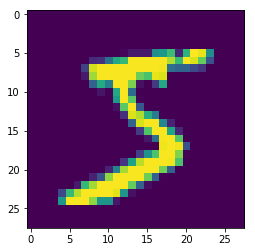

In [4]:
#
# It is always better to play with dataset first
# to know more details about it
#
# Like below, we print the shape of the training set
# i.e. it shows the total count of images and the
# size of each image
# (60000, 28, 28) => 60000 images of size 28x28
#
# We also plot the image using matplotlib's imshow func
# to get a visual understanding of the dataset
#

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#
# Keras requires input dataset to be in a certain format
# i.e. it needs 3 axes to be present, 2 for size and
# 1 for number of channels
#
# Since this is a grayscale image, number of channels will
# be 1. And hence we use `reshape` function to add another
# axes
#
# This is done for all the data: training & test
#

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#
# A neural network learns its weights by continuously adding
# gradient error vectors (multiplied by a learning rate)
# computed from backpropagation as it is trained
#
# With current dataset, the ranges of distribution of values
# will vary a lot and if they are not normalized the gradient
# descent algorithm will oscillate a lot to figure out better
# minima
#
# Hence, datasets are usually normalized to a smaller range.
# In this case, they are divided by max pixel value which is 255
# Since division is performed all values are initially converted
# to float
#

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
#
# We must look at how dataset output is encoded and convert it to
# a format required by Keras
#
# As we can see below, dataset output is direct value for the image
# If image is number 5, output value is 5
#

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
#
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# 
# As the network will map the input image of size 28x28x1 to an output
# of size 10x1, we need to encode the output values to a 10-dim class
#
# Each index of 10x1 array, indicates a number.
# For Ex: 
#     5 is encoded as [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
#

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
#
# Here's how our output values looks like after encoding
# it to 10-dimensional class
#
# Following shows first 10 output values
#

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
#
# Import required modules to build the network
#

from keras.layers import Activation, MaxPooling2D

#
# We are building a Sequential network i.e. a network
# with sequential layers of convolution, max-pooling &
# activation layers
# There are no skip connections or branches involved here
#
# We are just building the network here
# To actually run it, we will need to compile it first
#

model = Sequential()

#
# Following is block of two layers:
#  * A convolutional layer with 32 Kernels of size (3x3x1)
#  * Followed by an Activation layer of type `relu` (allows only postive values)
#
# This outputs a image with 32 channels
# 
# Since this is the first layer, input_shape should be specified
#

# Input Dim: 28x28x1
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# Global Receptive Field: 3x3

#
# Following takes input from previous layer and hence we don't have
# to specify the input_shape here
#
# This is also block of two layers as mentioned earlier
#
# Here the number of kernels is 64, each of size 3x3x32
#
# Same explanation goes for the layer following it, with number
# of kernels = 128, each of size 3x3x64
#

# Input Dim: 26x26x32
model.add(Convolution2D(64, 3, 3, activation='relu'))
# Global Receptive Field: 5x5

# Input Dim: 24x24x64
model.add(Convolution2D(128, 3, 3, activation='relu'))
# Global Receptive Field: 7x7

#
# Following is max-pooling layer, it used to reduce the channel
# size. It also groups common features together. This helps
# greatly in reducing the number of parameters and hence making
# it more faster and compute efficient
#
# We usually max-pool over 2x2 pixel
#
# Also this layer is commonly added after initial few layers
#

# Input Dim: 22x22x128
model.add(MaxPooling2D(pool_size=(2, 2)))
# Global Receptive Field: 8x8

#
# Same explanation goes for the following layers as mentioned above
# 

# Input Dim: 11x11x128
model.add(Convolution2D(256, 3, 3, activation='relu'))
# Global Receptive Field: 12x12

# Input Dim: 9x9x256
model.add(Convolution2D(512, 3, 3, activation='relu'))
# Global Receptive Field: 16x16

# Input Dim: 7x7x512
model.add(Convolution2D(1024, 3, 3, activation='relu'))
# Global Receptive Field: 20x20

# Input Dim: 5x5x1024
model.add(Convolution2D(2048, 3, 3, activation='relu'))
# Global Receptive Field: 24x24

#
# As we need 10 classes, we do a convolution of 3x3 (10) 
#

# Input Dim: 3x3x2048
model.add(Convolution2D(10, 3, 3, activation='relu'))
# Global Receptive Field: 28x28

#
# Since the output will be in matrix format, it needs to be
# flattened into an array
#

# Input Dim: 1x1x10
model.add(Flatten())

#
# Finally Softmax to convert the output to probability distribution
# so that we get the most confident value as our output value
#

# Input Dim: 1x10
model.add(Activation('softmax'))

#
# We have built the network, to see how our network looks, number of
# params required etc, we use the following function
#

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Upd

In [0]:
#
# Above model must be compiled inorder to train our dataset
#
# As part of compilation we can specific how our network should
# be trained and how it should be interpreted
#
# Loss = Loss function used in backpropation
# Optimizer = Gradient Descent algorithm used in backpropagation
# Metric = Metric to be considered for evaluation network performance
#          In this case, `accuracy`. If we accuracy increases after each
#          epoch then we are in right direction, if decreases then something
#          is wrong with the network. If constant, then we con stop the training
#

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
#
# Now that the model is ready and compiled, we can start training it
#
# We fit function with following arguments to it:
#  * X_train, Y_train = Training dataset
#  * batch_size = At a time how many images should be passed to the network.
#                 If we pass single image, then our network will learn only
#                 about that image, and on passing other image it'll forget what
#                 it learnt earlier. Hence we pass a batch of images selected at
#                 random
#  * nb_epoch = Number of times a batch of different images is to be passed.
#               Number of epoch is set based on trial & error, once we see that
#               the accuracy is constant and not changing much we fix the epoch
#               value
#

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.1164 - acc: 0.1886
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.2715 - acc: 0.1131
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 2.3026 - a

In [0]:
#
# Evaluate function is used to run test data on the trained network
# And get the score of how it performed on test data
#

score = model.evaluate(X_test, Y_test, verbose=0)

In [17]:
#
# evaluate outputs two values:
#  * loss value
#  * accuracy
#
# Above shows how does the network performs on unseen data
#

print(score)

[2.3025851249694824, 0.098]


In [0]:
#
# We can now input an unseen image to the network
# and see what value it predicts
#

y_pred = model.predict(X_test)

In [19]:
#
# As seen below, network predicted output donot match actual output
# This is because the network is badly designed
#

print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


### Why is the model not performing well?
 * High number of parameters: There are so many layers with increased number of channels. Also there is only one max-pooling layer used to reduce channel size. This introduces high number of parameters causing the network to learn slower and needs high compute capacity. It needs much longer time & higher epochs to train
 * Lesser epoch value: Since there are so many parameters, network can't be trained with just 10 epochs
 * Less number of max pooling layers: With appropriate number of max-pooling layers ( in this network 2 would be ideal), network learns faster and can perform much better